In [1]:
import sqlite3
import pandas as pd
import numpy as np

df_top = pd.read_csv("./hw_5_data/top_airports.csv")
df_icao = pd.read_csv("./hw_5_data/ICAO_airports.csv")


#datatype and find only the airports that we care about by indexing
city = [str(df_top[df_top["ICAO"]== j].City).split("\n", 1)[0].split(" ", 1)[1].strip() for j in df_top["ICAO"]]
ident = [str(df_top[df_top["ICAO"]== j].ICAO).split("\n", 1)[0].split(" ", 1)[1].strip() for j in df_top["ICAO"]]
long = [float(df_icao[df_icao["ident"]== j].longitude_deg) for j in df_top["ICAO"]]
lat = [float(df_icao[df_icao["ident"]== j].latitude_deg) for j in df_top["ICAO"]]


In [3]:
#we create our table
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()

sql_cmd = """DROP TABLE top_airports"""
cursor.execute(sql_cmd)

sql_cmd = """CREATE TABLE top_airports (id INTEGER PRIMARY KEY AUTOINCREMENT, icao_code TEXT,
            city TEXT, long FLOAT, lat FLOAT)"""
cursor.execute(sql_cmd)

#we add our data
for j in range(0,len(ident)):
    sql_cmd = ("INSERT INTO top_airports (icao_code, city, long, lat)" +     
        " VALUES " + "('" + str(ident[j]) + "', '" + str(city[j]) + "', " + str(long[j]) + ", " + str(lat[j]) + ")") 
    cursor.execute(sql_cmd)
connection.commit()
connection.close()

In [75]:
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()

sql_cmd = """SELECT * FROM top_airports WHERE top_airports.city like 'Atlanta'"""

cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print(entry)
    
connection.commit()
connection.close()

(1, 'KATL', 'Atlanta', -84.4281005859375, 33.6366996765137)


l

l

In [6]:
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()

sql_cmd = """DROP TABLE weather"""
cursor.execute(sql_cmd)

sql_cmd = """CREATE TABLE IF NOT EXISTS weather (id INTEGER PRIMARY KEY AUTOINCREMENT, date DATE, icao_code TEXT,
            temp_high FLOAT, temp_low FLOAT, avg_humidity FLOAT, avg_precipitation FLOAT)"""
cursor.execute(sql_cmd)
connection.commit()
connection.close()

In [8]:
from bs4 import BeautifulSoup

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

In [9]:
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()

for icode in ident:
    for j in range(0,11):
        #create some arrays that we may or may not need (lol)
        date = []
        temp_high = []
        temp_low = []
        hum = []
        precip = []
        
        #generate the weather url to access
        year = 2008+j
        url = "https://www.wunderground.com/history/airport/" + \
            "/" + str(icode) + "/" + str(year) + "/" +\
            "1/1/CustomHistory.html?dayend=31&monthend=12&yearend=" + str(year)
        print(url)
        response = urlopen(url)
        html = response.read()
        response.close()
        
        #startup a beautifulsoup parser
        soup = BeautifulSoup(html,"html.parser")
        items = soup.find("table", {"id": "obsTable"})
#        print(items)
        #start to parse the different days
        day_num = len(items.findAll("a"))
        day = items.findNext("a")
        
        for i in range(0, day_num - 1):  #iterate over the days
            date.append(str(day).split(str(icode) + "/",1)[1].replace("/","-",2).split("/",1)[0])
            for col in range(0,19): #iterate over the measurements taken that day
                day = day.findNext("td")
#                print(day)
                if(col == 0):
                    if(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0] == ""): #deal with a bad value
                        temp_high.append(9999)
                        continue
#                    print(float(str(day).split(">",1)[1]v.split("<",1)[0]))
                    temp_high.append(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                if(col == 2):
                    if(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0] == ""): #deal with a bad value
                        temp_low.append(9999)
                        continue
#                    print(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                    temp_low.append(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                if(col == 7):
                    if(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0] == ""): #deal with a bad value
                        hum.append(9999)
                        continue
#                    print(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0])
                    hum.append(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                if(col == 18):
                    if(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0] == "T"): #deal with a bad value
                        precip.append(9999)
                        continue
#                    print(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                    precip.append(float(str(day).split(">",1)[1].split(">",1)[1].split("<",1)[0]))
                
            sql_cmd = ("INSERT INTO weather (date, icao_code, temp_high, temp_low, avg_humidity, avg_precipitation)" +     
                " VALUES " + "('" + str(date[-1]) + "', '" + str(icode) + "', " + str(temp_high[-1]) +
                       ", " + str(temp_low[-1]) + ", " + str(hum[-1]) + ", " + str(precip[-1]) + ")")
#            print(sql_cmd)
            day = day.findNext("a")
#            print(day)
            cursor.execute(sql_cmd)

connection.commit()
connection.close()

https://www.wunderground.com/history/airport//KATL/2008/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2008
https://www.wunderground.com/history/airport//KATL/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KATL/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KATL/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KATL/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KATL/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013
https://www.wunderground.com/history/airport//KATL/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014
https://www.wunderground.com/history/airport//KATL/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KATL/2016/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KSFO/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014
https://www.wunderground.com/history/airport//KSFO/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KSFO/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KSFO/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KSFO/2018/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2018
https://www.wunderground.com/history/airport//KIAH/2008/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2008
https://www.wunderground.com/history/airport//KIAH/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KIAH/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KIAH/2011/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KEWR/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KEWR/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KEWR/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KEWR/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KEWR/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013
https://www.wunderground.com/history/airport//KEWR/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014
https://www.wunderground.com/history/airport//KEWR/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KEWR/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KEWR/2017/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KLGA/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KLGA/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KLGA/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KLGA/2018/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2018
https://www.wunderground.com/history/airport//KIAD/2008/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2008
https://www.wunderground.com/history/airport//KIAD/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KIAD/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KIAD/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KIAD/2012/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KMDW/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KMDW/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KMDW/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KMDW/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013
https://www.wunderground.com/history/airport//KMDW/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014
https://www.wunderground.com/history/airport//KMDW/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KMDW/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KMDW/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KMDW/2018/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KMEM/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KMEM/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KMEM/2018/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2018
https://www.wunderground.com/history/airport//KCLE/2008/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2008
https://www.wunderground.com/history/airport//KCLE/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KCLE/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KCLE/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KCLE/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KCLE/2013/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KHOU/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KHOU/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KHOU/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013
https://www.wunderground.com/history/airport//KHOU/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014
https://www.wunderground.com/history/airport//KHOU/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015
https://www.wunderground.com/history/airport//KHOU/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016
https://www.wunderground.com/history/airport//KHOU/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KHOU/2018/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2018
https://www.wunderground.com/history/airport//KSNA/2008/1/1/CustomHistory.html?dayend=31

https://www.wunderground.com/history/airport//KSAT/2017/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2017
https://www.wunderground.com/history/airport//KSAT/2018/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2018
https://www.wunderground.com/history/airport//KCVG/2008/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2008
https://www.wunderground.com/history/airport//KCVG/2009/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2009
https://www.wunderground.com/history/airport//KCVG/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010
https://www.wunderground.com/history/airport//KCVG/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011
https://www.wunderground.com/history/airport//KCVG/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012
https://www.wunderground.com/history/airport//KCVG/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013
https://www.wunderground.com/history/airport//KCVG/2014/1/1/CustomHistory.html?dayend=31

In [15]:
#confirm that the table works
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()
sql_cmd = """SELECT date, temp_high as temp, avg_precipitation as precipitation
    FROM weather WHERE weather.icao_code like '""" + str("KORD") + "'"

cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print([float(entry[1]), float(entry[2])])



[27.0, 0.05]
[20.0, 9999.0]
[23.0, 0.0]
[36.0, 0.0]
[43.0, 9999.0]
[60.0, 0.01]
[65.0, 0.03]
[56.0, 0.66]
[39.0, 0.0]
[44.0, 0.3]
[36.0, 0.01]
[41.0, 0.0]
[37.0, 9999.0]
[27.0, 0.02]
[26.0, 9999.0]
[40.0, 0.0]
[33.0, 0.08]
[27.0, 9999.0]
[6.0, 9999.0]
[10.0, 0.0]
[27.0, 0.1]
[29.0, 0.08]
[14.0, 0.04]
[10.0, 0.0]
[20.0, 0.03]
[32.0, 0.05]
[35.0, 0.0]
[44.0, 0.02]
[48.0, 0.2]
[12.0, 0.0]
[26.0, 0.25]
[30.0, 0.14]
[30.0, 9999.0]
[32.0, 0.16]
[44.0, 0.33]
[40.0, 0.18]
[34.0, 0.54]
[27.0, 9999.0]
[38.0, 0.07]
[36.0, 9999.0]
[16.0, 0.0]
[15.0, 9999.0]
[22.0, 0.13]
[21.0, 9999.0]
[34.0, 9999.0]
[24.0, 0.0]
[33.0, 0.01]
[47.0, 1.1]
[32.0, 9999.0]
[14.0, 9999.0]
[19.0, 0.02]
[23.0, 9999.0]
[27.0, 9999.0]
[33.0, 0.0]
[36.0, 0.0]
[34.0, 0.45]
[32.0, 0.25]
[23.0, 0.0]
[26.0, 0.02]
[38.0, 0.12]
[33.0, 0.0]
[57.0, 0.07]
[56.0, 0.61]
[31.0, 0.0]
[36.0, 9999.0]
[32.0, 9999.0]
[26.0, 9999.0]
[25.0, 0.01]
[35.0, 9999.0]
[35.0, 9999.0]
[48.0, 0.0]
[44.0, 0.0]
[57.0, 0.0]
[57.0, 0.0]
[39.0, 0.0]
[37.0, 0.

[88.0, 0.05]
[85.0, 0.75]
[84.0, 0.07]
[80.0, 0.47]
[76.0, 0.0]
[78.0, 0.0]
[81.0, 0.0]
[84.0, 0.23]
[85.0, 0.09]
[81.0, 0.14]
[84.0, 0.84]
[83.0, 0.0]
[86.0, 0.43]
[84.0, 0.19]
[76.0, 0.0]
[73.0, 9999.0]
[74.0, 0.0]
[76.0, 0.0]
[80.0, 0.0]
[87.0, 0.0]
[91.0, 9999.0]
[89.0, 0.39]
[82.0, 0.05]
[81.0, 9999.0]
[73.0, 0.01]
[76.0, 0.0]
[79.0, 0.0]
[85.0, 9999.0]
[74.0, 0.09]
[78.0, 0.0]
[83.0, 0.01]
[82.0, 0.04]
[81.0, 0.0]
[88.0, 0.0]
[83.0, 9999.0]
[74.0, 0.55]
[81.0, 9999.0]
[73.0, 9999.0]
[74.0, 0.0]
[85.0, 0.01]
[69.0, 9999.0]
[70.0, 0.0]
[60.0, 0.31]
[65.0, 0.2]
[64.0, 0.1]
[64.0, 0.94]
[65.0, 0.03]
[67.0, 0.0]
[75.0, 0.0]
[80.0, 9999.0]
[74.0, 0.25]
[70.0, 9999.0]
[65.0, 0.0]
[63.0, 0.0]
[71.0, 0.0]
[73.0, 9999.0]
[69.0, 0.14]
[57.0, 0.0]
[66.0, 0.0]
[70.0, 9999.0]
[72.0, 0.29]
[82.0, 0.0]
[76.0, 0.0]
[71.0, 0.02]
[56.0, 0.0]
[54.0, 0.0]
[60.0, 0.0]
[73.0, 0.0]
[59.0, 0.0]
[54.0, 9999.0]
[51.0, 1.6]
[51.0, 9999.0]
[65.0, 0.0]
[71.0, 0.0]
[56.0, 0.5]
[58.0, 0.0]
[75.0, 9999.0]
[65.0,

In [89]:
#define function to get distance (i took this from a random github)
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [129]:
#and now we look at the correlations
connection = sqlite3.connect("./hw_5.db")
cursor = connection.cursor()


fin_dist = []
fin_tempcorr = []
fin_precipcorr = []
fin_longdif = []
for cor_day in [1,3,7]: #looking for correlation between these day numbers
    cities = []
    tempcorrs = []
    precipcorrs = []
    for air1 in ident: #iterate over one airport
        for air2 in ident: #iterate over the other
            if((air1 == air2) or (air1.index(air1) > air2.index(air2))): #get rid of duplicates
                continue
            first = []
            second = []
            
            #sql command
            sql_cmd = """SELECT temp_high as temp, avg_precipitation as precipitation
                FROM weather WHERE weather.icao_code like '""" + str(air1) + "'"
            

            first = pd.read_sql_query(sql_cmd, connection)
    
            sql_cmd = """SELECT temp_high as temp, avg_precipitation as precipitation
                FROM weather WHERE weather.icao_code like '""" + str(air2) + "'"
        
            second = pd.read_sql_query(sql_cmd, connection)

            #check table dimensions
            
            if(first.shape[0] > second.shape[0]):
                for i in range(0,first.shape[0] - second.shape[0]):
                    first = first.drop(first.index[-1])
            if(first.shape[0] < second.shape[0]):
                for i in range(0,second.shape[0] - first.shape[0]):
                    second = second.drop(second.index[-1])
                
            first = first.replace(9999,np.NaN)
            first = first.fillna(method = "ffill")
            first = first.fillna(method = "bfill")
            
            second = second.replace(9999,np.NaN)
            second = second.fillna(method = "ffill")
            second = second.fillna(method = "bfill")
            
            #clip the arrays so that we correlate the appropriate time delay
            second = second.drop(second.index[0:cor_day])
            first = first.drop(first.index[(-1 - cor_day):-1])
#            print(first.shape)
            
            #perform the correlation
            tempcorrs.append(np.corrcoef(first["temp"],second["temp"],rowvar=False)[0,1])
            precipcorrs.append(np.corrcoef(first["precipitation"],second["precipitation"],rowvar=False)[0,1])
            cities.append(str(air1) + " " + str(air2))
    
    #get cities so that we can calculate distance
    dists = []
    longdif = []
    for case in cities:
        city1, city2 = str(case).split(" ")[0], str(case).split(" ")[1]
        sql_cmd = "SELECT lat, long FROM top_airports WHERE " + \
            "top_airports.icao_code like '" + str(city1) + "'"
        cursor.execute(sql_cmd)

        db_info = cursor.fetchall()
        loc1 = db_info[0]

        sql_cmd = "SELECT lat, long FROM top_airports WHERE " + \
            "top_airports.icao_code like '" + str(city2) + "'"
        cursor.execute(sql_cmd)

        db_info = cursor.fetchall()
        loc2 = db_info[0]
        
        dists.append(distance(loc1,loc2))
        longdif.append(abs(loc1[1] - loc2[1]))
    
    fin_dist.append(dists)
    fin_tempcorr.append(tempcorrs)
    fin_precipcorr.append(precipcorrs)
    fin_longdif.append(longdif)

In [130]:
#clip the lists to find the top 10 most correlated
top_temp = []
top_prec = []
temp_dist = []
temp_long = []
prec_dist = []
prec_long = []
for i in range(0,3):
    list1, list2 = (list(t) for t in zip(*sorted(zip(fin_tempcorr[i], fin_dist[i]))))
    list3, list4 = (list(t) for t in zip(*sorted(zip(fin_tempcorr[i], fin_longdif[i]))))
    top_temp.append(list1[-1-10:-1])
    temp_dist.append(list2[-1-10:-1])
    temp_long.append(list4[-1-10:-1])
    
    list1, list2 = (list(t) for t in zip(*sorted(zip(fin_precipcorr[i], fin_dist[i]))))
    list3, list4 = (list(t) for t in zip(*sorted(zip(fin_precipcorr[i], fin_longdif[i]))))
    top_prec.append(list1[-1-10:-1])
    prec_dist.append(list2[-1-10:-1])
    prec_long.append(list4[-1-10:-1])
print(top_prec[0])

[0.3368037602625118, 0.34436720343144939, 0.34564850018318205, 0.34689060969179886, 0.37049901742004465, 0.37503115359532341, 0.38092097866866687, 0.38783465532739869, 0.39195269377382447, 0.39888967326360986]


[None, None]

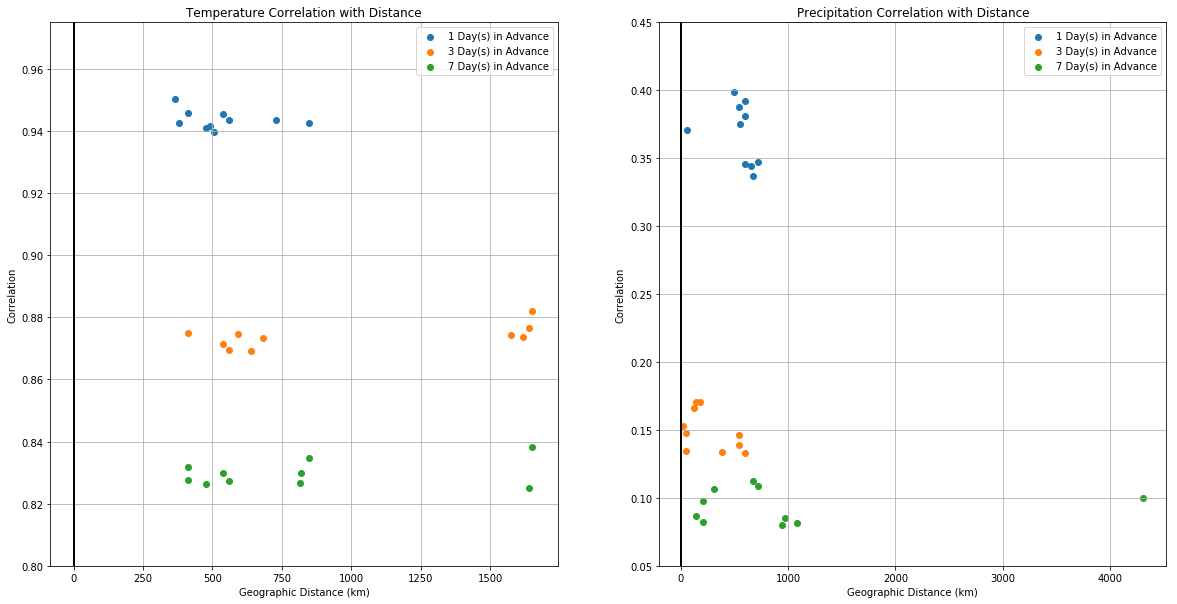

In [132]:
import matplotlib.pyplot as plt
from matplotlib import rc, gridspec, cm

%matplotlib inline

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

dayspread = ["1","3","7"]
for i in range(0,3):
    ax1.scatter(temp_dist[i], top_temp[i], label = dayspread[i] + " Day(s) in Advance")
    
for i in range(0,3):
    ax2.scatter(prec_dist[i], top_prec[i], label = dayspread[i] + " Day(s) in Advance")

ax1.grid()
ax1.legend(loc='upper right')

ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_frame_on(True)

ax1.set_title('Temperature Correlation with Distance')
ax1.set_xlabel('Geographic Distance (km)')
ax1.set_ylabel('Correlation')
ax1.set_ylim([0.8,.975])

ax2.grid()
ax2.legend(loc='upper right')

ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_frame_on(True)

ax2.set_title('Precipitation Correlation with Distance')
ax2.set_xlabel('Geographic Distance (km)')
ax2.set_ylabel('Correlation')
ax2.set_ylim([0.05,.45])

plt.setp(ax1.lines, linewidth=2)
plt.setp(ax2.lines, linewidth=2)

    

[None, None]

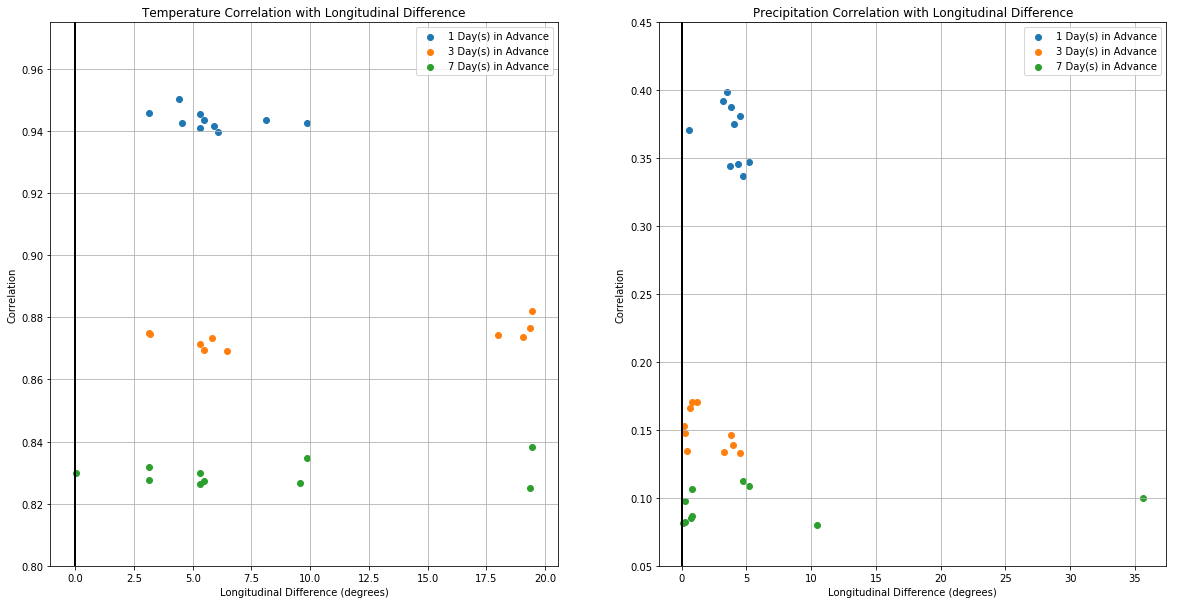

In [133]:
%matplotlib inline

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

dayspread = ["1","3","7"]
for i in range(0,3):
    ax1.scatter(temp_long[i], top_temp[i], label = dayspread[i] + " Day(s) in Advance")
    
for i in range(0,3):
    ax2.scatter(prec_long[i], top_prec[i], label = dayspread[i] + " Day(s) in Advance")

ax1.grid()
ax1.legend(loc='upper right')

ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_frame_on(True)

ax1.set_title('Temperature Correlation with Longitudinal Difference')
ax1.set_xlabel('Longitudinal Difference (degrees)')
ax1.set_ylabel('Correlation')
ax1.set_ylim([0.8,.975])

ax2.grid()
ax2.legend(loc='upper right')

ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_frame_on(True)

ax2.set_title('Precipitation Correlation with Longitudinal Difference')
ax2.set_xlabel('Longitudinal Difference (degrees)')
ax2.set_ylabel('Correlation')
ax2.set_ylim([0.05,.45])

plt.setp(ax1.lines, linewidth=2)
plt.setp(ax2.lines, linewidth=2)